# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets
import torch

In [3]:
from file_io import load_pickle_file
from constants import *
from utils import *
from image_transforms import IMAGE_TRANSFORMS
from interpreters.utils import get_interpreter
import logging

In [4]:
if RANDOM_SEED:
    set_random_seeds(RANDOM_SEED)
logging.basicConfig(level=logging.INFO)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
Interpreter = get_interpreter(IS_MULTILABEL_CLASSIFICATION)
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.9368421052631579

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

Grizzly bears    0.964286
Teddybears       1.000000
Black bears      0.861111
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

,Grizzly bears,Teddybears,Black bears
Grizzly bears,0.964286,0.0,0.035714
Teddybears,0.000000,1.0,0.000000
Black bears,0.138889,0.0,0.861111


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,Grizzly bears propability,Teddybears propability,Black bears propability,true,predicted,error,confidence
22,0.998803,0.000687,0.000511,[Black bears],[Grizzly bears],0.666326,0.998204
8,0.880858,0.000102,0.119040,[Black bears],[Grizzly bears],0.587307,0.827720
79,0.756807,0.037118,0.206075,[Black bears],[Grizzly bears],0.529283,0.651845
9,0.736199,0.024898,0.238903,[Black bears],[Grizzly bears],0.507398,0.632081
93,0.750356,0.000163,0.249481,[Black bears],[Grizzly bears],0.500346,0.661749


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,Grizzly bears propability,Teddybears propability,Black bears propability,true,predicted,error,confidence
15,0.487467,0.003871,0.508663,[Grizzly bears],[Black bears],0.341689,0.494535
9,0.736199,0.024898,0.238903,[Black bears],[Grizzly bears],0.507398,0.632081
43,0.147113,0.758364,0.094522,[Teddybears],[Teddybears],0.161090,0.639171
79,0.756807,0.037118,0.206075,[Black bears],[Grizzly bears],0.529283,0.651845
93,0.750356,0.000163,0.249481,[Black bears],[Grizzly bears],0.500346,0.661749


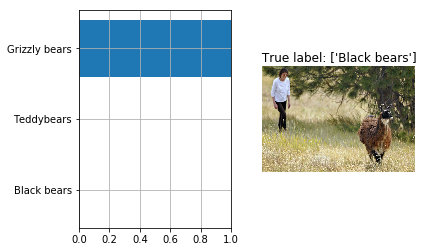

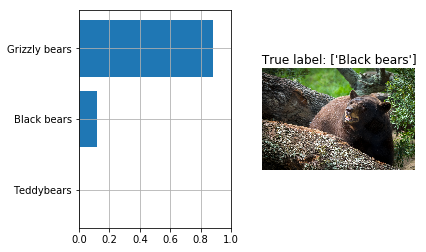

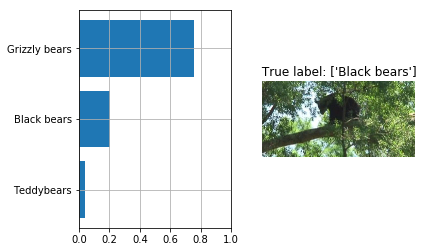

In [15]:
interpreter.plot_most_incorrect_samples(3)

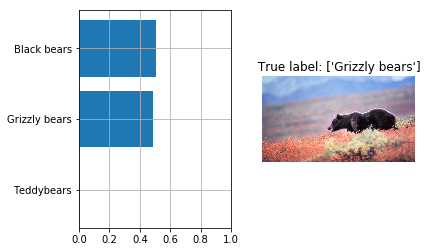

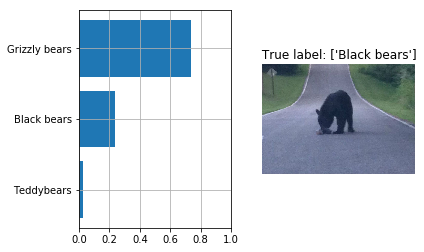

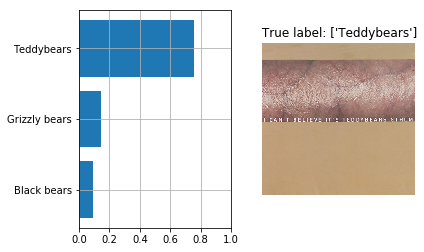

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=94), Output()), _do…